# Kakovost življenja v EU

Pri projektu bomo analizirali oceno kakovosti življenja prebivalcev različnih držav Evropske unije. Zanima nas kateri faktorji npr. BDP na prebivalca države, kvaliteta šolskega sistema, mere neenakosti, občutek varnosti prebivalca, ure dela tedensko oz. work-life balance... najmočneje vplivajo na kakovost življenja posameznika.

Podatke bomo večinoma dobivali iz Eurostata, saj imajo veliko kvalitetnih podatkov o različnih državah Evropske unije, ki jih portal kot je OPSI nima.

## Uvoz podatkov

Opomba: Če podatkov ni je namesto podatka tam število 0.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import *


#Uvoz podatkov v obliki pandas dataframe
dropoutsCsv = pd.read_csv('./Data/Dropouts.csv')  # Odstotek populacije ki pusti šolo
equalityIndexCsv = pd.read_csv('./Data/EqualityIndex.csv')  # Equality index
emigrationCsv = pd.read_csv('./Data/emigration.csv')  # Število ljudi ki se je odselilo
gdpPerCapitaCsv = pd.read_csv('./Data/Gdp.csv')  # Gross domestic produce per capita
inflationCsv = pd.read_csv('./Data/Inflation.csv')  # Odstotek inflacije
migrationCsv = pd.read_csv('./Data/migration.csv')  # Število ljudi ki se je priselilo
minimumWageCsv = pd.read_csv('./Data/Minimal wage.csv')  # Minimalna bruto plača
unemploymentCsv = pd.read_csv('./Data/unenployment(procent populacije).csv')  # Nezaposlen odstotek odrasle populacije
workingHoursCsv = pd.read_csv('./Data/WorkingHoursWeekly.csv')  # Povprečno število delavnih ur na teden
qualityOfLifeCsv = pd.read_csv('./Data/QOL_Index.csv') # QOL index

#Tole je iracunana mnozica preseka drzav, ki se pojavljajo v vseh csv datotekah
#Postopek racunanja sem pobrisal

obravnavaneDrzave = [
 'Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Serbia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom']


#Brisanje vrstic z odvecnimi drzavami
for index, row in dropoutsCsv.iterrows():
    if row['Drzava'] not in obravnavaneDrzave:
        dropoutsCsv.drop(index, inplace=True)

for index, row in emigrationCsv.iterrows():
    if row['Country'] not in obravnavaneDrzave:
        emigrationCsv.drop(index, inplace=True)

for index, row in equalityIndexCsv.iterrows():
    if row['Drzava'] not in obravnavaneDrzave:
        equalityIndexCsv.drop(index, inplace=True)

for index, row in gdpPerCapitaCsv.iterrows():
    if row['TIME'] not in obravnavaneDrzave:
        gdpPerCapitaCsv.drop(index, inplace=True)

for index, row in inflationCsv.iterrows():
    if row['TIME'] not in obravnavaneDrzave:
        inflationCsv.drop(index, inplace=True)

for index, row in migrationCsv.iterrows():
    if row['country'] not in obravnavaneDrzave:
        migrationCsv.drop(index, inplace=True)

for index, row in minimumWageCsv.iterrows():
    if row['country'] not in obravnavaneDrzave:
        minimumWageCsv.drop(index, inplace=True)

for index, row in unemploymentCsv.iterrows():
    if row['country'] not in obravnavaneDrzave:
        unemploymentCsv.drop(index, inplace=True)

for index, row in workingHoursCsv.iterrows():
    if row['Country'] not in obravnavaneDrzave:
        workingHoursCsv.drop(index, inplace=True)


qualityOfLifeCsv = qualityOfLifeCsv.iloc[:, [1, 2]]

for index, row in qualityOfLifeCsv.iterrows():
    if row['Country'] not in obravnavaneDrzave:
        qualityOfLifeCsv.drop(index, inplace=True)

qualityOfLifeCsv = qualityOfLifeCsv.sort_values(by="Country")
dropoutsCsv = dropoutsCsv.sort_values(by="Drzava")
equalityIndexCsv = equalityIndexCsv.sort_values(by="Drzava")
emigrationCsv = emigrationCsv.sort_values(by="Country")
gdpPerCapitaCsv = gdpPerCapitaCsv.sort_values(by="TIME")
inflationCsv = inflationCsv.sort_values(by="TIME")
migrationCsv = migrationCsv.sort_values(by="country")
minimumWageCsv = minimumWageCsv.sort_values(by="country")
unemploymentCsv = unemploymentCsv.sort_values(by="country")
workingHoursCsv = workingHoursCsv.sort_values(by="Country")




## Vizualizacije podatkov

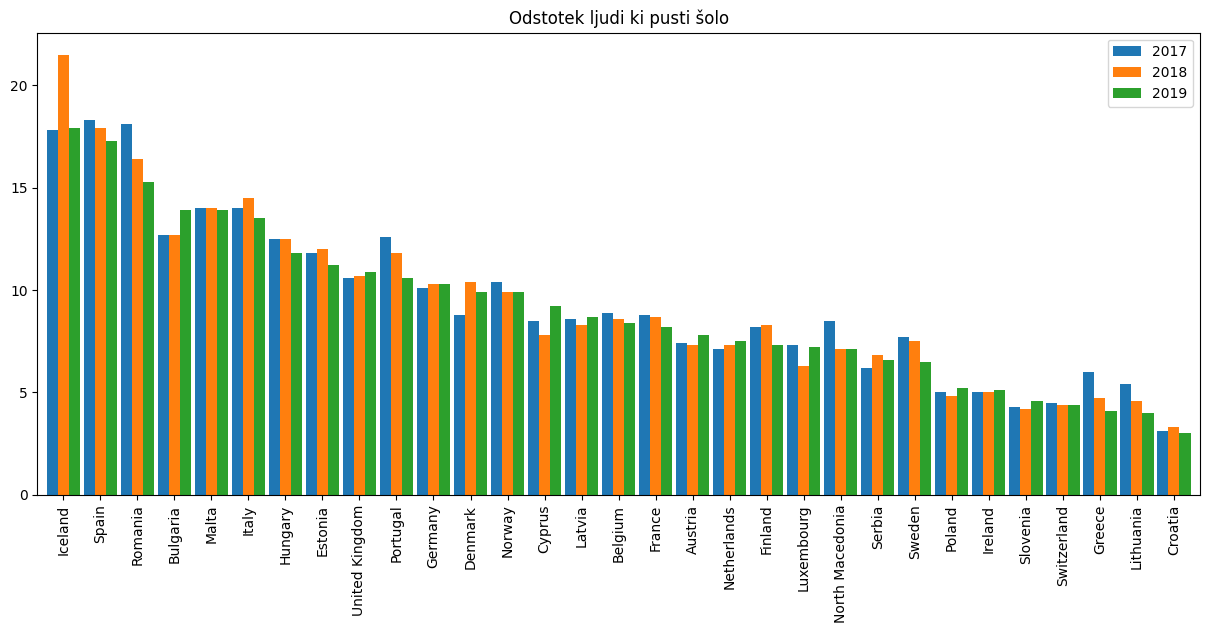

In [2]:
dropouts2019 = list(dropoutsCsv['2019'])
dropouts2018 = list(dropoutsCsv['2018'])
dropouts2017 = list(dropoutsCsv['2017'])
drzave = list(dropoutsCsv['Drzava'])
df = pd.DataFrame({'2017':dropouts2017, '2018':dropouts2018, '2019':dropouts2019}, index=drzave)
df_sorted = df.sort_values(by='2019', ascending=False)
ax = df_sorted.plot.bar(rot=90, figsize=(15, 6), width=0.9, title="Odstotek ljudi ki pusti šolo")
ax.figure.savefig('./Slike/dropouts.png')

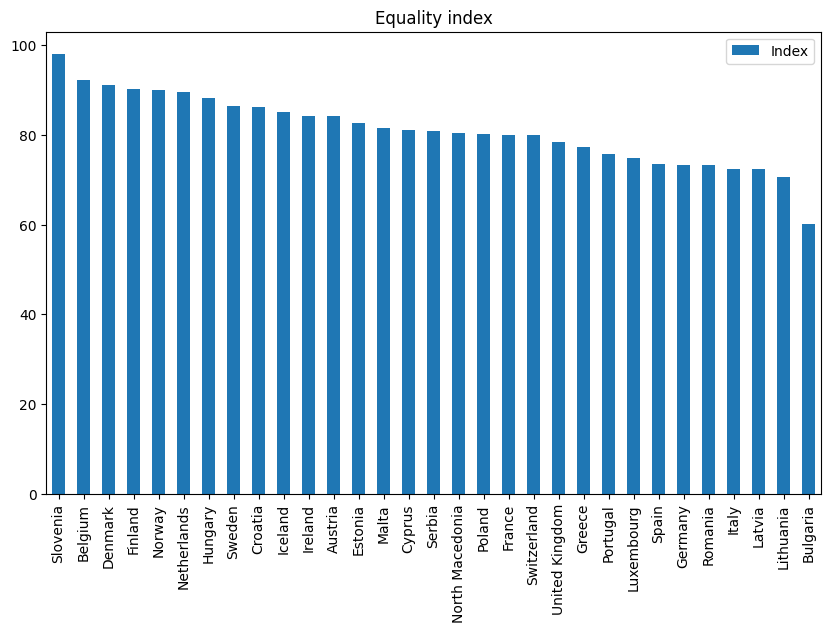

In [3]:
Index = list(equalityIndexCsv['Index'])
drzave = list(equalityIndexCsv['Drzava'])
df = pd.DataFrame({'Index':Index}, index=drzave)
df_sorted = df.sort_values(by='Index', ascending=False)
ax = df_sorted.plot.bar(rot=90, figsize=(10, 6), title="Equality index")
ax.figure.savefig('./Slike/EqualityIndex.png')

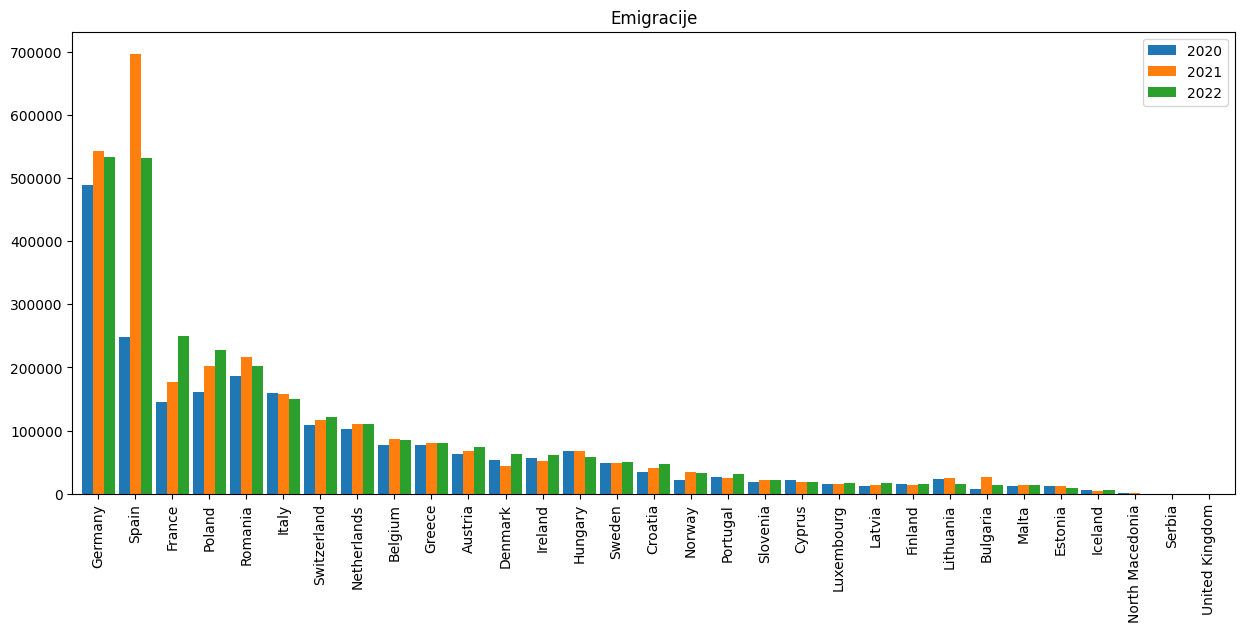

In [4]:
emigration2020 = list(emigrationCsv['2020'])
emigration2021 = list(emigrationCsv['2021'])
emigration2022 = list(emigrationCsv['2022'])
drzave = list(emigrationCsv['Country'])
df = pd.DataFrame({'2020':emigration2020, '2021':emigration2021, '2022':emigration2022}, index=drzave)
df_sorted = df.sort_values(by='2022', ascending=False)
ax = df_sorted.plot.bar(rot=90, figsize=(15, 6), width=0.9, title="Emigracije")
ax.figure.savefig('./Slike/emigration.png')

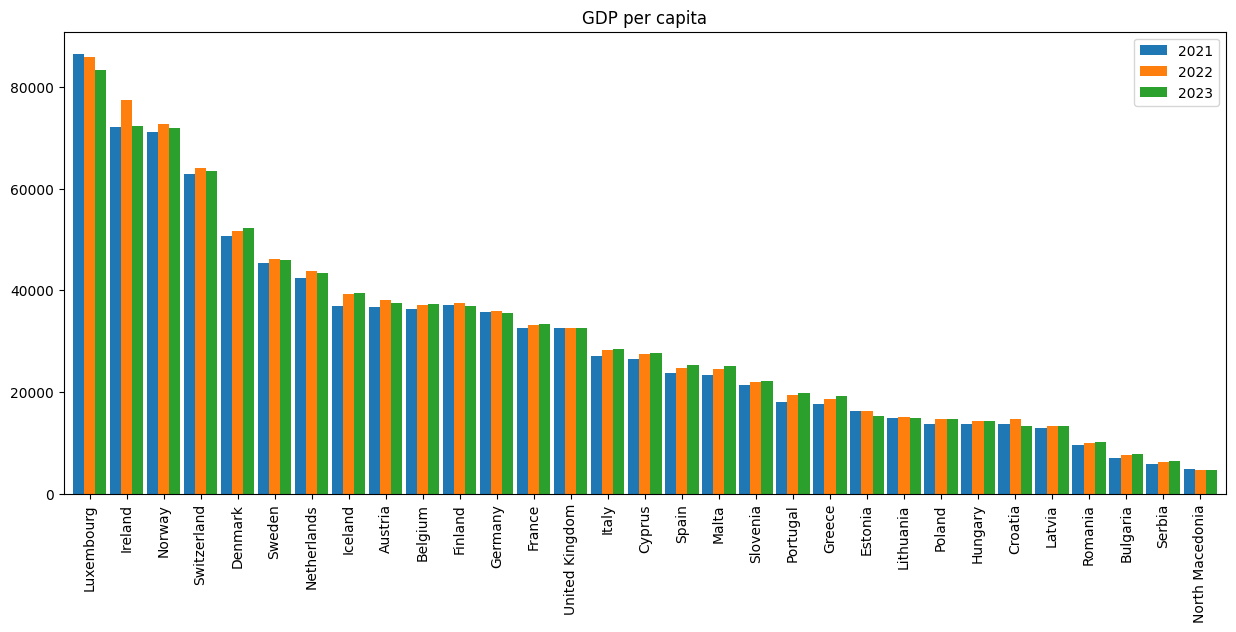

In [5]:
gdp2021 = [int(value) for value in gdpPerCapitaCsv['2021']]
gdp2022 = [int(value) for value in gdpPerCapitaCsv['2022']]
gdp2023 = [int(value) for value in gdpPerCapitaCsv['2023']]
drzave = list(gdpPerCapitaCsv['TIME'])
df = pd.DataFrame({'2021':gdp2021, '2022':gdp2022, '2023':gdp2023}, index=drzave)
df_sorted = df.sort_values(by='2023', ascending=False)
ax = df_sorted.plot.bar(rot=90, figsize=(15, 6), width=0.9, title="GDP per capita")
ax.figure.savefig('./Slike/gdp.png')

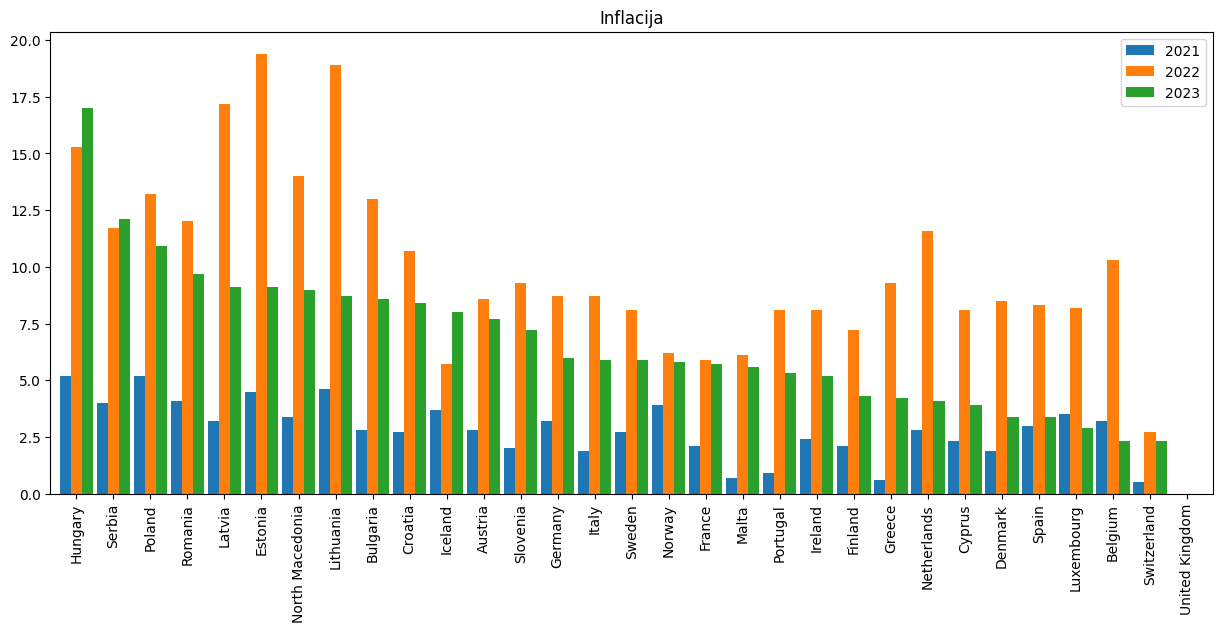

In [6]:
inflation2021 = [float(value) for value in inflationCsv['2021']]
inflation2022 = [float(value) for value in inflationCsv['2022']]
inflation2023 = [float(value) for value in inflationCsv['2023']]
drzave = list(inflationCsv['TIME'])
df = pd.DataFrame({'2021':inflation2021, '2022':inflation2022, '2023':inflation2023}, index=drzave)
df_sorted = df.sort_values(by='2023', ascending=False)
ax = df_sorted.plot.bar(rot=90, figsize=(15, 6), width=0.9, title="Inflacija")
ax.figure.savefig('./Slike/inflation.png')

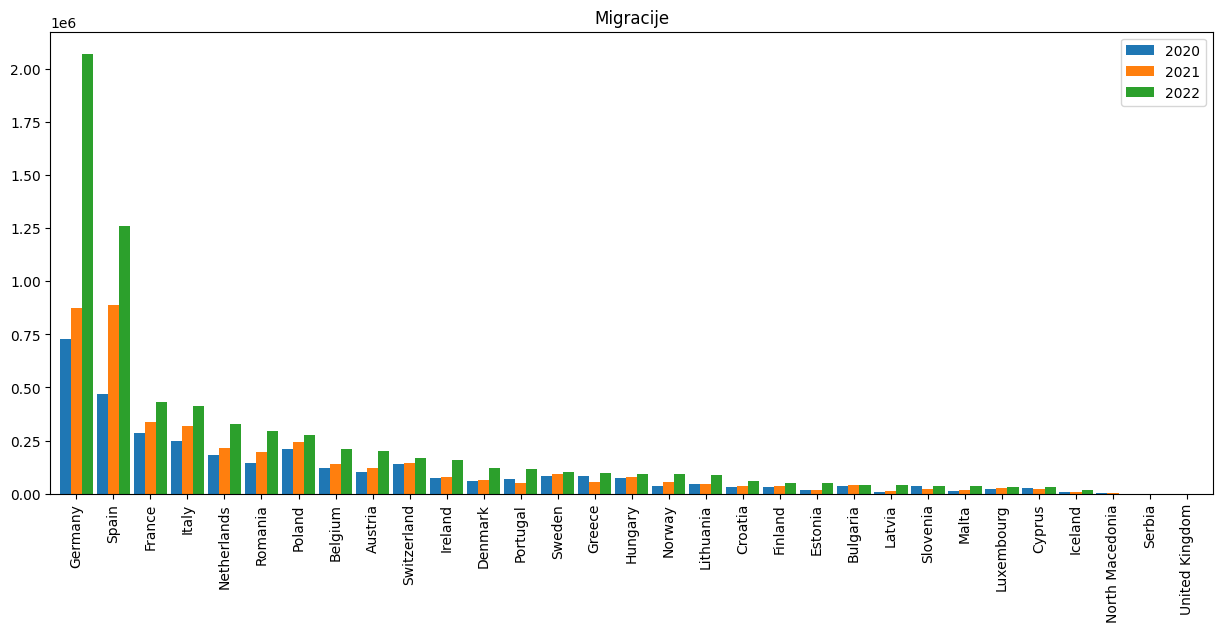

In [7]:
migration2021 = [int(value) for value in migrationCsv['2021']]
migration2022 = [int(value) for value in migrationCsv['2022']]
migration2020 = [int(value) for value in migrationCsv['2020']]
drzave = list(migrationCsv['country'])
df = pd.DataFrame({'2020':migration2020, '2021':migration2021, '2022':migration2022}, index=drzave)
df_sorted = df.sort_values(by='2022', ascending=False)
ax = df_sorted.plot.bar(rot=90, figsize=(15, 6), width=0.9, title="Migracije")
ax.figure.savefig('./Slike/migration.png')

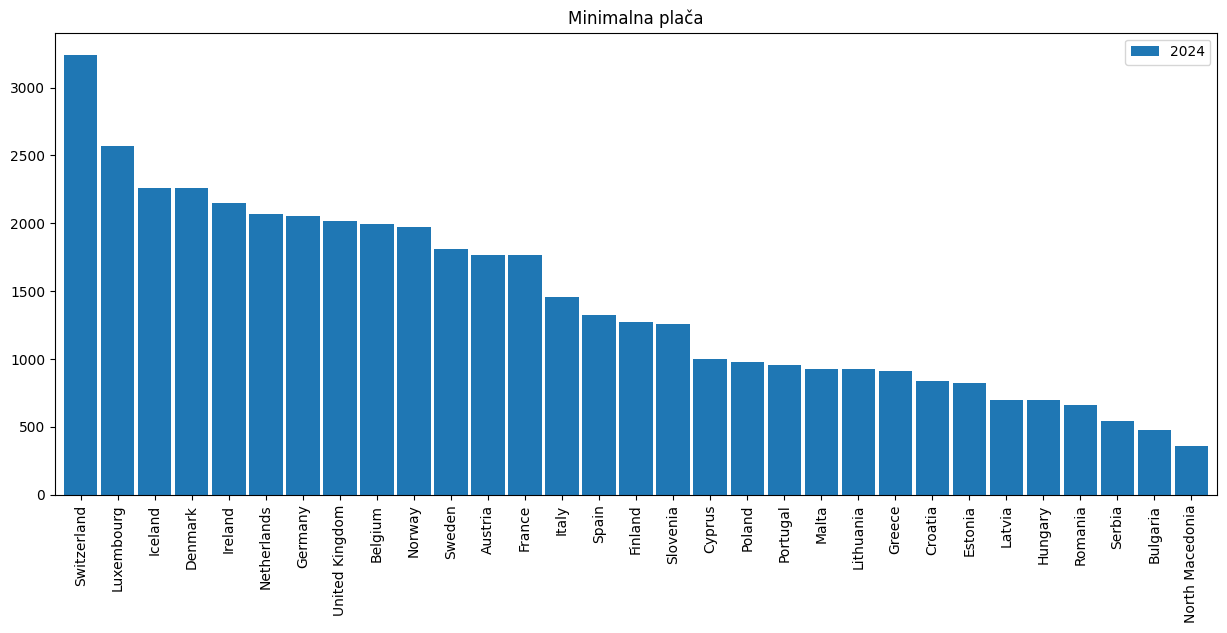

In [8]:
minWage2024 = [float(value) for value in minimumWageCsv['2024']]
drzave = list(minimumWageCsv['country'])
df = pd.DataFrame({'2024':minWage2024}, index=drzave)
df_sorted = df.sort_values(by='2024', ascending=False)
ax = df_sorted.plot.bar(rot=90, figsize=(15, 6), width=0.9, title="Minimalna plača")
ax.figure.savefig('./Slike/minWage.png')

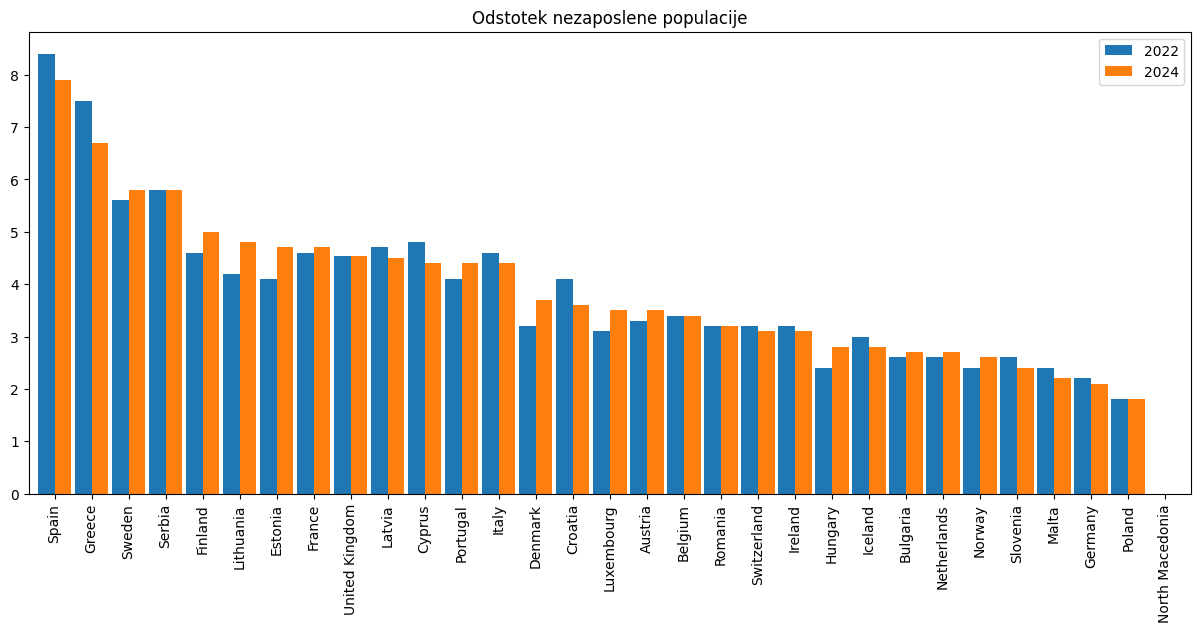

In [9]:
unemployment2024 = [float(value) for value in unemploymentCsv['2024']]
unemployment2022 = [float(value) for value in unemploymentCsv['2022']]
drzave = list(minimumWageCsv['country'])
df = pd.DataFrame({'2022':unemployment2022, '2024':unemployment2024}, index=drzave)
df_sorted = df.sort_values(by='2024', ascending=False)
ax = df_sorted.plot.bar(rot=90, figsize=(15, 6), width=0.9, title="Odstotek nezaposlene populacije")
ax.figure.savefig('./Slike/unemployment.png')

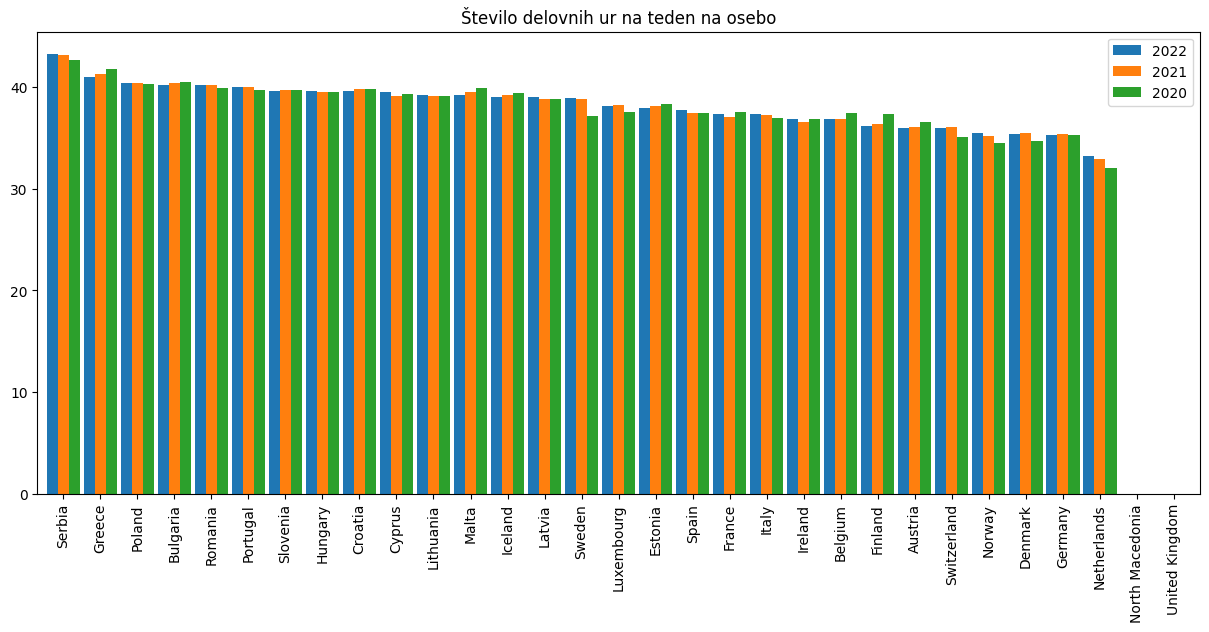

In [10]:
workingHours2022 = [float(value) for value in workingHoursCsv['2022']]
workingHours2021 = [float(value) for value in workingHoursCsv['2021']]
workingHours2020 = [float(value) for value in workingHoursCsv['2020']]
drzave = list(workingHoursCsv['Country'])
df = pd.DataFrame({'2022':workingHours2022, '2021':workingHours2021, '2020':workingHours2020}, index=drzave)
df_sorted = df.sort_values(by='2022', ascending=False)
ax = df_sorted.plot.bar(rot=90, figsize=(15, 6), width=0.9, title="Število delovnih ur na teden na osebo")
ax.figure.savefig('./Slike/workingHours.png')

## Korelacija

In [11]:
def getAverage(dataframe):
    return dataframe.iloc[:, 1:].mean(axis=1, numeric_only=True)

dropoutsAvg = getAverage(dropoutsCsv)
emigrtionAvg = getAverage(emigrationCsv)
equalityIdxAvg = getAverage(equalityIndexCsv)
gdpAvg = getAverage(gdpPerCapitaCsv)
inflationAvg = getAverage(inflationCsv)
minWageAvg = getAverage(minimumWageCsv)
unemploymentPerThousandAvg = getAverage(unemploymentCsv)
workingHoursAvg = getAverage(workingHoursCsv)
qualityOfLifeAvg = getAverage(qualityOfLifeCsv)

def getCorrCoeff1(dataframe):
    return dataframe.corr(qualityOfLifeAvg)

def getCorrCoeff2(dataframe, dataframe2):
    return dataframe.corr(dataframe2, method='pearson')

corrDropouts = getCorrCoeff1(dropoutsAvg)
corrEmigration = getCorrCoeff1(emigrtionAvg)
corrEqualityIdxAvg = getCorrCoeff1(equalityIdxAvg)
corrGdp = getCorrCoeff1(gdpAvg)
corrInflation = getCorrCoeff1(inflationAvg)
corrMinWage = getCorrCoeff1(minWageAvg)
corrUnemployment = getCorrCoeff1(unemploymentPerThousandAvg)
corrWorkingHours = getCorrCoeff1(workingHoursAvg)

print(f"Korelacija med številom ljudi ki pustijo šolo in QoL: %s" % corrDropouts)
print(f"Korelacija med emigracijami in QoL: %s" % corrEmigration)
print(f"Korelacija med indeksom enakosti in QoL: %s" % corrEqualityIdxAvg)
print(f"Korelacija med GDP in QoL: %s" % corrGdp)
print(f"Korelacija med inflacijo in QoL: %s" % corrInflation)
print(f"Korelacija med minimalno plačo in QoL: %s" % corrMinWage)
print(f"Korelacija med nezaposlenostjo in QoL: %s" % corrUnemployment)
print(f"Korelacija med številom delavnih ur in QoL: %s" % corrWorkingHours)

Korelacija med številom ljudi ki pustijo šolo in QoL: -0.1919506855908695
Korelacija med emigracijami in QoL: 0.27104662010922825
Korelacija med indeksom enakosti in QoL: 0.9762301861645994
Korelacija med GDP in QoL: -0.24638215734081523
Korelacija med inflacijo in QoL: 0.0001996004305513209
Korelacija med minimalno plačo in QoL: -0.08836573273536945
Korelacija med nezaposlenostjo in QoL: 0.12418378119005352
Korelacija med številom delavnih ur in QoL: -0.19378756739860226


## Personaliziran Quality of life index

Najprej moramo normalizirati naše podatke. Za to uporabimo spodnjo funkcijo normalizacija()

In [27]:
def normalizacija(atribut):
    atribut = getAverage(atribut)
    min = atribut.min()
    max = atribut.max()
    for i, val in atribut.items():
        atribut[i] = (val - min) /(max-min)
    return atribut

dropoutsNorm = normalizacija(dropoutsCsv)
equalityIndexNorm = normalizacija(equalityIndexCsv)
emigrationNorm = normalizacija(emigrationCsv)
gdpPerCapitaNorm = normalizacija(gdpPerCapitaCsv)
inflationNorm = normalizacija(inflationCsv)
migrationNorm = normalizacija(migrationCsv)
minimumWageNorm = normalizacija(minimumWageCsv)
unemploymentNorm = normalizacija(unemploymentCsv)
workingHoursNorm = normalizacija(workingHoursCsv)


Sedaj naredimo seznam v katerem bodo seznami normaliziranih vrednosti. Ta 2D seznam nam bo prišel prav pri računanju želenega indexa.

In [30]:
normaliziraneVrednosti = [list(dropoutsNorm), list(emigrationNorm), list(equalityIndexNorm), list(gdpPerCapitaNorm), list(inflationNorm), list(minimumWageNorm), list(unemploymentNorm), list(workingHoursNorm)]

Sedaj uporabimo spodnje funkcije da si naračunamo svoj index. Vhod v funkcijo je seznam uteži. Gledamo po tem kaj nam je najbolj pomembno, vsota uteži mora biti 1, vseh uteži pa mora biti 8, saj je atributov ki jih upoštevamo tudi 8. 

In [31]:
from collections import *

def getWeightedResults(utezi: list):
    if len(utezi) != 8:
        print("Vnesi 8 uteži.")
        return
    if sum(utezi) != 1:
        print("Vsota uteži mora biti 1.")
        return
    
    rezultati = [0 for _ in range(len(obravnavaneDrzave))]
    
    for j, drzava in enumerate(obravnavaneDrzave):
        for i in range(len(utezi)):
            rezultati[j] += normaliziraneVrednosti[i][j] * utezi[i]
    
    rezultat_dict = defaultdict(int)
    for i, rez in enumerate(rezultati):
        rezultat_dict[obravnavaneDrzave[i]] = rez

    return rezultat_dict

def izpisirezultate(rezultat_dict):
    sorted_dict = sorted(rezultat_dict.items(), key=lambda item: item[1], reverse=True)
    for i, (key, value) in enumerate(sorted_dict):
        print(f"{i + 1}. {key}: {value:.4f}")

utezi = [0.1, 0.2, 0.1, 0.3, 0.1, 0, 0.1, 0.1]

izpisirezultate(getWeightedResults(utezi))

1. Spain: 0.5849
2. Norway: 0.4952
3. Luxembourg: 0.4933
4. Germany: 0.4844
5. Iceland: 0.4306
6. Sweden: 0.4053
7. France: 0.4044
8. Belgium: 0.3965
9. Denmark: 0.3927
10. Italy: 0.3840
11. Switzerland: 0.3835
12. Romania: 0.3806
13. Ireland: 0.3747
14. Finland: 0.3741
15. Austria: 0.3738
16. United Kingdom: 0.3676
17. Hungary: 0.3669
18. Netherlands: 0.3620
19. Greece: 0.3526
20. Serbia: 0.3399
21. Portugal: 0.3392
22. Estonia: 0.3388
23. Poland: 0.3293
24. Malta: 0.3199
25. Cyprus: 0.3121
26. Slovenia: 0.3092
27. Latvia: 0.2830
28. Croatia: 0.2790
29. Lithuania: 0.2654
30. North Macedonia: 0.2550
31. Bulgaria: 0.2192
